# Objective

The project aims to provide a deep understanding of workforce trends and deliver a personalized job recommendation system. By analyzing job market data, the platform will identify high-demand roles, uncover salary patterns, highlight emerging job categories, and provide job seekers with tailored opportunities that align with their preferences and market needs.

## Situational Overview

The job market is dynamic, influenced by technological disruptions, economic cycles, and evolving work preferences such as remote jobs. This project will leverage advanced data analytics and predictive modeling to uncover valuable insights, empowering both job seekers and recruiters to make informed, strategic decisions. By combining historical and live job posting data, the platform will act as a one-stop tool for career trends exploration and personalized job recommendations.

# Load and Explore the Data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset

upwork = "C:/Users/vipin/OneDrive/Documents/Desktop/Project 8/all_upwork_jobs_2024-02-07-2024-03-24.csv"

In [3]:
jobs = pd.read_csv(upwork)
jobs

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
...,...,...,...,...,...,...,...,...
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France


# Concise summarization of total information provided by the data

In [4]:
print("Dataset Shape:", jobs.shape)

Dataset Shape: (244828, 8)


In [5]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [6]:
#Displaying first 10 rows of our data

jobs.head(10)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
5,SEO for Portuguese Psychologist site,https://www.upwork.com/jobs/SEO-for-Portuguese...,2024-02-17 09:07:41+00:00,True,NaN,NaN,NaN,Portugal
6,Want to fix the WordPress Plugin,https://www.upwork.com/jobs/Want-fix-the-WordP...,2024-02-17 09:07:27+00:00,False,NaN,NaN,5.0,India
7,need Portuguese writers who can understand and...,https://www.upwork.com/jobs/need-Portuguese-wr...,2024-02-17 09:07:05+00:00,True,7.0,22.0,NaN,India
8,Looker Studio Dashboard for Leadgen and E-Comm...,https://www.upwork.com/jobs/Looker-Studio-Dash...,2024-02-17 09:06:24+00:00,True,NaN,NaN,NaN,Germany
9,PHP/HTML/CSS WordPress Developer Needed for We...,https://www.upwork.com/jobs/PHP-HTML-CSS-WordP...,2024-02-17 09:06:21+00:00,False,NaN,NaN,500.0,Canada


In [7]:
# counting no. of rows

jobs.count()

title             244827
link              244827
published_date    244828
is_hourly         244828
hourly_low        102422
hourly_high        98775
budget            103891
country           239751
dtype: int64

In [8]:
jobs.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country'],
      dtype='object')

# Clean and Preprocess the Data

In [9]:
jobs.isnull().sum()

title                  1
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

In [10]:
missing_values = jobs.isnull().mean() * 100
missing_values

title              0.000408
link               0.000408
published_date     0.000000
is_hourly          0.000000
hourly_low        58.165733
hourly_high       59.655350
budget            57.565720
country            2.073701
dtype: float64

## Insights

1) title and link: These columns have negligible missing values, only about 0.04% of the data is missing.

2) published_date and is_hourly: No missing values, as their missing percentage is 0%.

3) hourly_low and hourly_high: These columns have significant missing data (around 58% and 59%, respectively), indicating that more than half of the data for hourly rates is missing.

4) budget: Approximately 57.57% of the data in this column is missing, suggesting that a large portion of the budget information is not available.

5) country: This column has relatively low missing data, about 2.07%, which is fairly manageable.

Overall, the data has missing values mostly in the hourly_low, hourly_high, and budget columns. we need to handle these missing values, possibly by imputation or removal, depending on the analysis or modeling objectives.

In [11]:
# Fill missing values for categorical columns (like 'title', 'link') with 'Unknown' or 'Not Available'
jobs['title'] = jobs['title'].fillna('Unknown')
jobs['link'] = jobs['link'].fillna('Not Available')


In [12]:

# Fill missing values for numerical columns like 'hourly_low', 'hourly_high', 'budget' with the median
jobs['hourly_low'] = jobs['hourly_low'].fillna(jobs['hourly_low'].median())
jobs['hourly_high'] = jobs['hourly_high'].fillna(jobs['hourly_high'].median()) 
jobs['budget'] = jobs['budget'].fillna(jobs['budget'].median())


In [13]:
jobs['country'] = jobs['country'].fillna('Unknown')

In [14]:
# Data Preprocessing - Convert Dates
jobs['published_date'] = pd.to_datetime(jobs['published_date'])

In [15]:
print("\nMissing Values After Cleaning:")
print(jobs.isnull().sum())


Missing Values After Cleaning:
title             0
link              0
published_date    0
is_hourly         0
hourly_low        0
hourly_high       0
budget            0
country           0
dtype: int64


In [16]:
print("\nDescriptive Statistics:")
print(jobs.describe())


Descriptive Statistics:
          hourly_low    hourly_high          budget
count  244828.000000  244828.000000   244828.000000
mean       15.978773      34.829501      444.342967
std        11.789481      30.955729    10254.421295
min         3.000000       3.000000        5.000000
25%        15.000000      30.000000      100.000000
50%        15.000000      30.000000      100.000000
75%        15.000000      30.000000      100.000000
max       998.000000     999.000000  1000000.000000


hourly_low and hourly_high values have considerable variation, with extreme outliers as indicated by their high standard deviations and maximum values.

budget also shows significant outliers with some extremely high values, even though most budgets are clustered around $100.

Many of the values in all three columns (hourly rates and budget) seem to be concentrated around certain lower values like $Dollar 15 for hourly rates and $Dollar 100 for budget), but the presence of extreme outliers can skew the overall statistics (e.g., mean being much higher than the median).

# Task 1: Tokenizing Job Titles and Identifying Top Keywords

In [17]:
vectorizer = CountVectorizer(stop_words='english')
title_keywords = vectorizer.fit_transform(jobs['title'])

In [18]:
svd = TruncatedSVD(n_components=10, random_state=42)
reduced_matrix = svd.fit_transform(title_keywords)

In [19]:
keywords_df = pd.DataFrame(reduced_matrix)
keywords_summary = keywords_df.sum(axis=0).sort_values(ascending=False)

In [20]:
# Display Top 10 Keywords
print("\nTop 10 Keywords in Job Titles:")
print(keywords_summary.head(10))


Top 10 Keywords in Job Titles:
0    59132.027997
8    10714.261405
3     5521.544306
9     2581.086393
1     2189.478580
2     2043.849900
7      221.316915
5     -384.720472
4    -4487.316159
6    -9133.276077
dtype: float64


# Task 2: Identifying Emerging Job Categories

In [21]:
category_trends = jobs.groupby(['title', jobs['published_date'].dt.to_period('M')]).size().reset_index(name='post_count')
category_trends['published_date'] = category_trends['published_date'].dt.to_timestamp()

C:\Users\vipin\AppData\Local\Temp\ipykernel_12160\3397920720.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  category_trends = jobs.groupby(['title', jobs['published_date'].dt.to_period('M')]).size().reset_index(name='post_count')


# Identify Emerging Categories

In [22]:
# Compute growth rates
category_growth = category_trends.groupby('title')['post_count'].apply(
    lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] if len(x) > 1 else 0
).sort_values(ascending=False)

In [23]:

# Top 10 Emerging Categories
emerging_categories = category_growth.head(10)
print("\nEmerging Job Categories:")
print(emerging_categories)


Emerging Job Categories:
title
Virtual assistant                                             28.0
Appointment Setter For Instagram                              23.0
Social Media Management                                       21.0
Need Turkish writers that can understand and write Turkish    20.0
YouTube Growth Expert                                         15.0
Real Estate Virtual Assistant                                 12.0
Email Designer                                                10.0
Virtual Executive Assistant                                    9.0
UI/UX designer                                                 9.0
Video editor for long term                                     9.0
Name: post_count, dtype: float64


# Visualize Trends for Emerging Categories

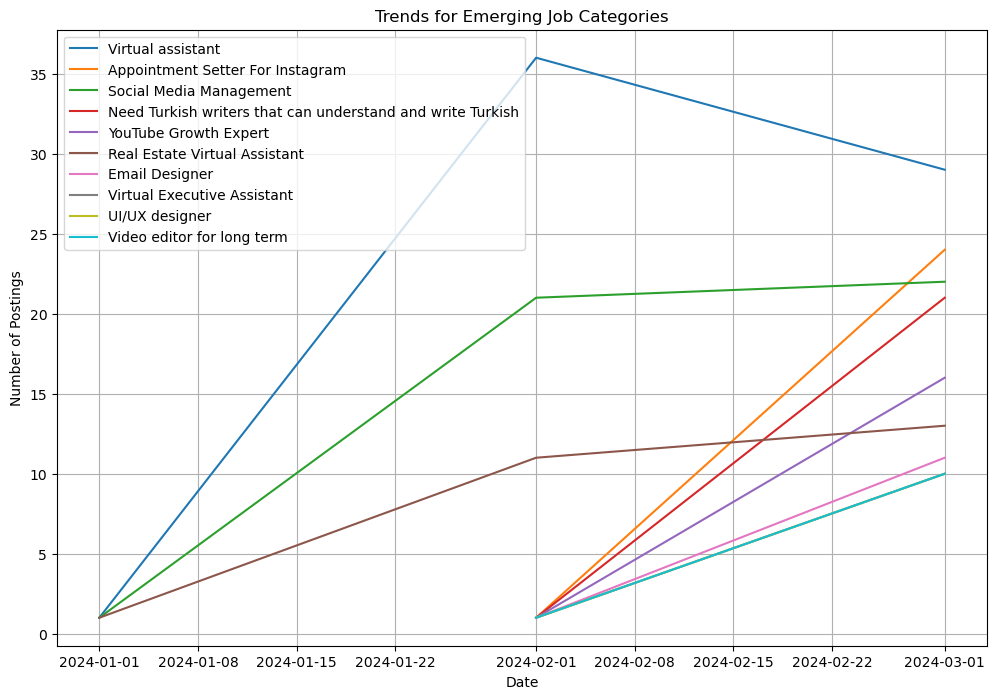

In [24]:
# Filter data for emerging categories
emerging_category_data = category_trends[category_trends['title'].isin(emerging_categories.index)]

# Plot trends
plt.figure(figsize=(12, 8))
for category in emerging_categories.index:
    category_data = emerging_category_data[emerging_category_data['title'] == category]
    plt.plot(category_data['published_date'], category_data['post_count'], label=category)

plt.xlabel('Date')
plt.ylabel('Number of Postings')
plt.title('Trends for Emerging Job Categories')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
top_categories = emerging_category_data.head(10)
top_categories

,title,published_date,post_count
12823,Appointment Setter For Instagram,2024-02-01,1
12824,Appointment Setter For Instagram,2024-03-01,24
56064,Email Designer,2024-02-01,1
56065,Email Designer,2024-03-01,11
123186,Need Turkish writers that can understand and w...,2024-02-01,1
123187,Need Turkish writers that can understand and w...,2024-03-01,21
146667,Real Estate Virtual Assistant,2024-01-01,1
146668,Real Estate Virtual Assistant,2024-02-01,11
146669,Real Estate Virtual Assistant,2024-03-01,13
168889,Social Media Management,2024-01-01,1


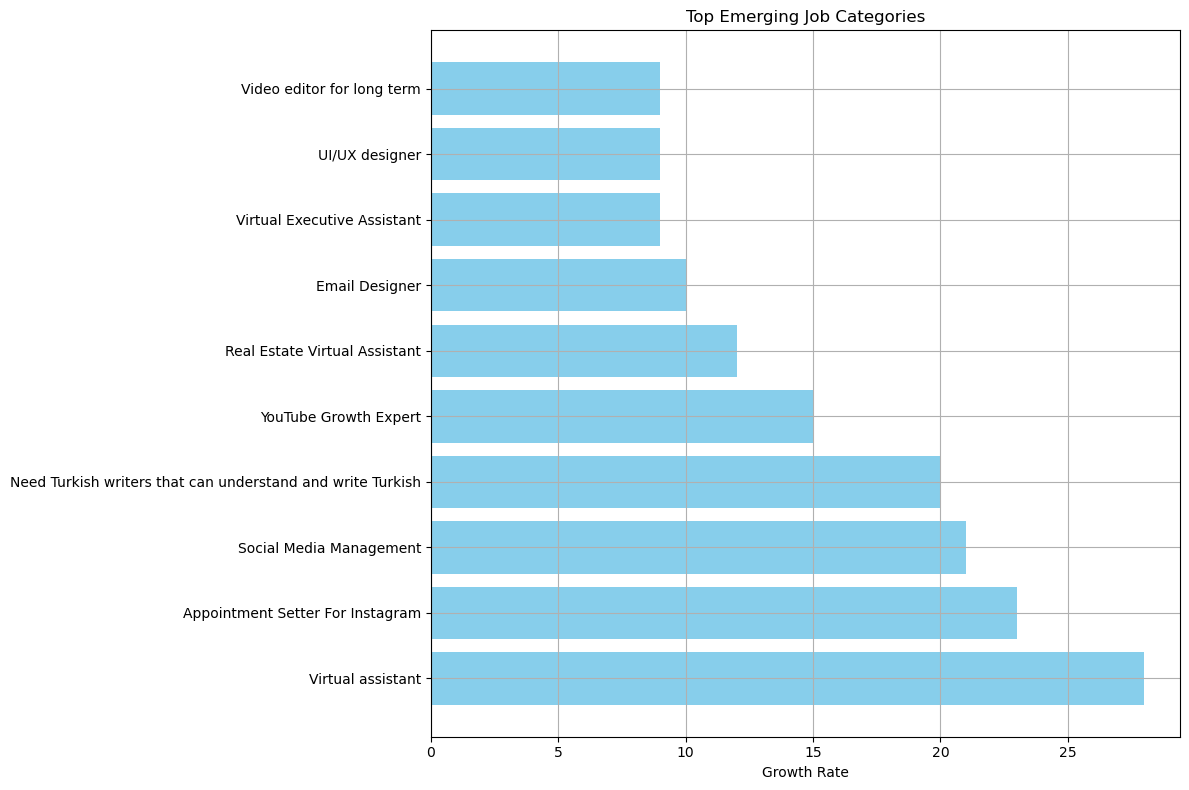

In [26]:
# Plot Emerging Job Categories
plt.figure(figsize=(12, 8))
plt.barh(emerging_categories.index, emerging_categories.values, color='skyblue')
plt.xlabel('Growth Rate')
plt.title('Top Emerging Job Categories')
plt.grid(True)
plt.tight_layout()
plt.show()

# Task 3: Forecasting High-Demand Roles

In [27]:
role_trends = jobs.groupby(['title', jobs['published_date'].dt.to_period('M')]).size().reset_index(name='post_count')
role_trends['published_date'] = role_trends['published_date'].dt.to_timestamp()


C:\Users\vipin\AppData\Local\Temp\ipykernel_12160\1436833030.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  role_trends = jobs.groupby(['title', jobs['published_date'].dt.to_period('M')]).size().reset_index(name='post_count')


In [28]:
role_trends_pivot = role_trends.pivot(index='published_date', columns='title', values='post_count').fillna(0)

In [29]:
job_role = role_trends_pivot.columns[0]
role_series = role_trends_pivot[job_role]

In [30]:
train_size = int(len(category_data) * 0.8)
train, test = role_series[:train_size], role_series[train_size:]

# Train a Predictive Model

In [31]:
# ARIMA Modeling
model = ARIMA(role_series, order=(5, 1, 0))
model_fit = model.fit()

c:\Users\vipin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vipin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vipin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vipin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\vipin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWa

In [32]:
# Forecast Next 12 Months
forecast = model_fit.forecast(steps=12)
print("\nForecast for Next 12 Months:")
print(forecast)


Forecast for Next 12 Months:
2024-04-01    0.000096
2024-05-01    0.000092
2024-06-01    0.999679
2024-07-01    0.000142
2024-08-01    0.000182
2024-09-01    0.000186
2024-10-01    0.999357
2024-11-01    0.000283
2024-12-01    0.000267
2025-01-01    0.000281
2025-02-01    0.999036
2025-03-01    0.000424
Freq: MS, Name: predicted_mean, dtype: float64


In [33]:
forecast = model_fit.forecast(steps=len(test))
rmse = np.sqrt(mean_squared_error(test, forecast))

# Print RMSE
print(f"RMSE for {job_role}: {rmse}")

RMSE for ! TOP TIER ACCOUNTS! OnlyFans Sellers Wanted !: 0.00018779236509342828


In [34]:
forecast = model_fit.forecast(steps=12)  # Ensure it returns 12 forecast values
print(len(forecast))  # Should print 12

12


In [35]:
forecast_dates = pd.date_range(role_series.index[-1], periods=12, freq='M')
print(forecast_dates)  # Check if it has 12 dates

DatetimeIndex(['2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28'],
              dtype='datetime64[ns]', freq='ME')


C:\Users\vipin\AppData\Local\Temp\ipykernel_12160\1187693200.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(role_series.index[-1], periods=12, freq='M')


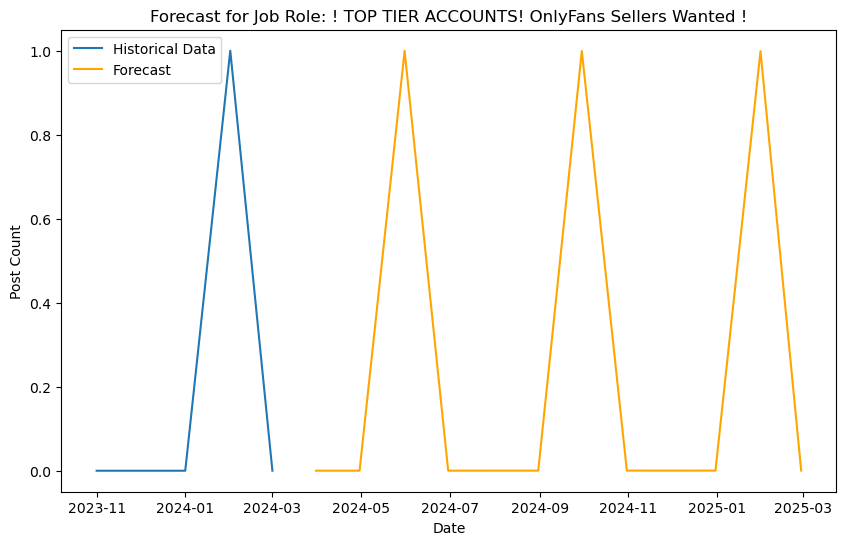

In [36]:
# Visualize Forecast
plt.figure(figsize=(10, 6))
plt.plot(role_series.index, role_series, label='Historical Data')
plt.plot(forecast_dates, forecast, label='Forecast', color='orange')
plt.title(f'Forecast for Job Role: {job_role}')
plt.xlabel('Date')
plt.ylabel('Post Count')
plt.legend()
plt.show()


# Task 4:  Comparative Salary Analysis by Region

In [37]:
# Group data by region and compute average salary
columns_of_interest = ['country', 'budget']
region_salary = jobs[columns_of_interest].groupby('country').mean().reset_index()

# Display prepared data
print(region_salary.head())


          country       budget
0   Aland Islands  2000.000000
1         Albania   215.670391
2         Algeria   109.573248
3  American Samoa    72.285714
4         Andorra   490.238095


In [38]:
import plotly.express as px

# Create an interactive map
fig = px.choropleth(region_salary, 
                    locations='country', 
                    locationmode='country names',
                    color='budget',
                    title='Average Salary by Region',
                    color_continuous_scale='Viridis')

fig.update_layout(
    width=1000,
    height=800,
)
fig.show()


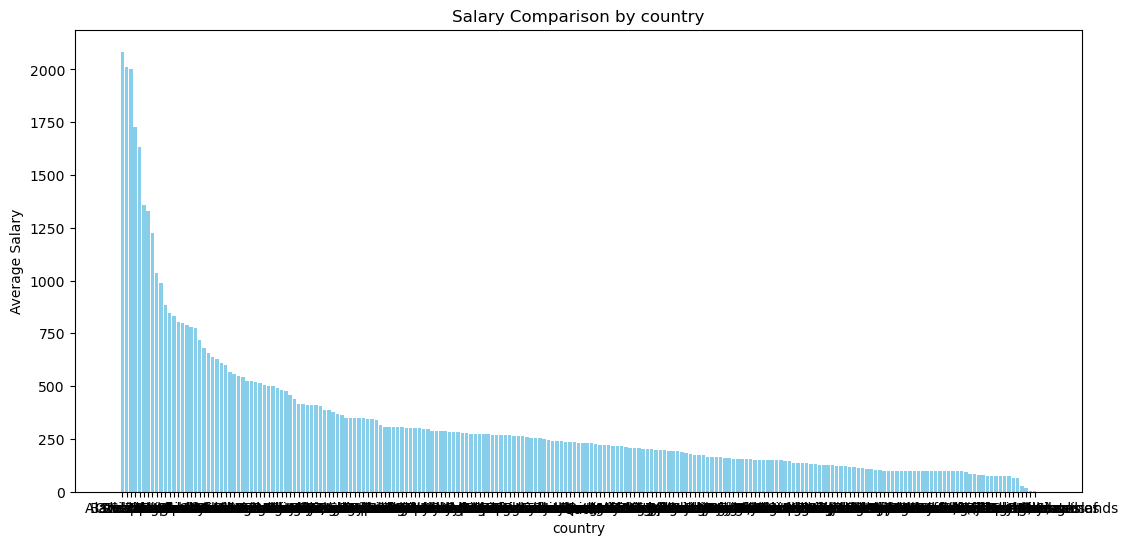

In [39]:
# Bar chart for country salary differences
region_salary_sorted = region_salary.sort_values(by='budget', ascending=False)

plt.figure(figsize=(13, 6))
plt.bar(region_salary_sorted['country'], region_salary_sorted['budget'], color='skyblue')
plt.xlabel('country')
plt.ylabel('Average Salary')
plt.title('Salary Comparison by country')
plt.show()


# Task 5: Building a Personalized Job Recommendation Engine

# Designing recommendation algorithm

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Prepare job descriptions
jobs['combined_features'] = jobs['link'] + " " + jobs['country'] + " " + jobs['title']
jobs['combined_features']


0         https://www.upwork.com/jobs/Experienced-Media-...
1         https://www.upwork.com/jobs/Full-Stack-Develop...
2         https://www.upwork.com/jobs/SMMA-Bubble-App_%7...
3         https://www.upwork.com/jobs/Talent-Hunter-Spec...
4         https://www.upwork.com/jobs/Data-Engineer_%7E0...
                                ...                        
244823    https://www.upwork.com/jobs/Need-Facebook-adve...
244824    https://www.upwork.com/jobs/Digital-Telemarket...
244825    https://www.upwork.com/jobs/WordPress-Template...
244826    https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...
244827    https://www.upwork.com/jobs/Creating-UGC-for-O...
Name: combined_features, Length: 244828, dtype: object

In [41]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(jobs['combined_features'])
tfidf_matrix

<244828x298403 sparse matrix of type '<class 'numpy.float64'>'
	with 3794578 stored elements in Compressed Sparse Row format>

In [42]:
# Normalize salary for scoring
jobs['normalized_salary'] = (jobs['budget'] - jobs['budget'].min()) / (jobs['budget'].max() - jobs['budget'].min())
jobs['normalized_salary']

0         0.000495
1         0.001095
2         0.000095
3         0.000095
4         0.000645
            ...   
244823    0.000095
244824    0.000095
244825    0.000095
244826    0.000010
244827    0.000045
Name: normalized_salary, Length: 244828, dtype: float64

# Recommendation Function

In [43]:
def recommend_jobs(preferences, num_recommendations=5):

    query = " ".join(preferences.values())
    query_vec = tfidf.transform([query])
    
    similarity_scores = cosine_similarity(query_vec, tfidf_matrix).flatten()

    scores = similarity_scores + jobs['normalized_salary']

    top_indices = scores.argsort()[-num_recommendations:][::-1]
    recommended_jobs = jobs.iloc[top_indices]

    return recommended_jobs[['job_title', 'location', 'salary', 'job_category']]


In [44]:
def recommend_jobs(preferences, jobs):
    filtered_data = jobs[
        (jobs['title'].str.contains(preferences['title'], na=False)) &
        (jobs['country'] == preferences['country']) &
        (jobs['budget'] >= preferences['budget'])
    ]
    return filtered_data

In [45]:
user_preferences = {'title': 'Python', 'country': 'Remote', 'budget': 60000}
recommendations = recommend_jobs(user_preferences, jobs)

In [46]:
# Display recommendations
import streamlit as st

st.table(recommendations[['title', 'country', 'budget']])

2025-01-14 13:33:48.041 
  command:

    streamlit run C:\Users\vipin\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

# Task 6: Monitoring Workforce Dynamics

In [47]:
# Monthly insights: Job categories over time
monthly_trends = jobs.groupby([jobs['published_date'].dt.to_period('M'), 'title']).size().unstack(fill_value=0)



C:\Users\vipin\AppData\Local\Temp\ipykernel_12160\3391110045.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [48]:
# Visualize workforce dynamics
#fig = px.line(monthly_trends, x=monthly_trends.index, y=monthly_trends.columns, title="Job Market Dynamics")
#st.plotly_chart(fig)

# Task 7: Remote Work Landscape Analysis

In [49]:
# Filter for remote jobs
remote_jobs = jobs[jobs['title'].str.contains('remote', case=False, na=False)]

In [50]:
# Analyze growth of remote jobs
remote_trends = remote_jobs.groupby(remote_jobs['published_date'].dt.to_period('M')).size()

C:\Users\vipin\AppData\Local\Temp\ipykernel_12160\408051996.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



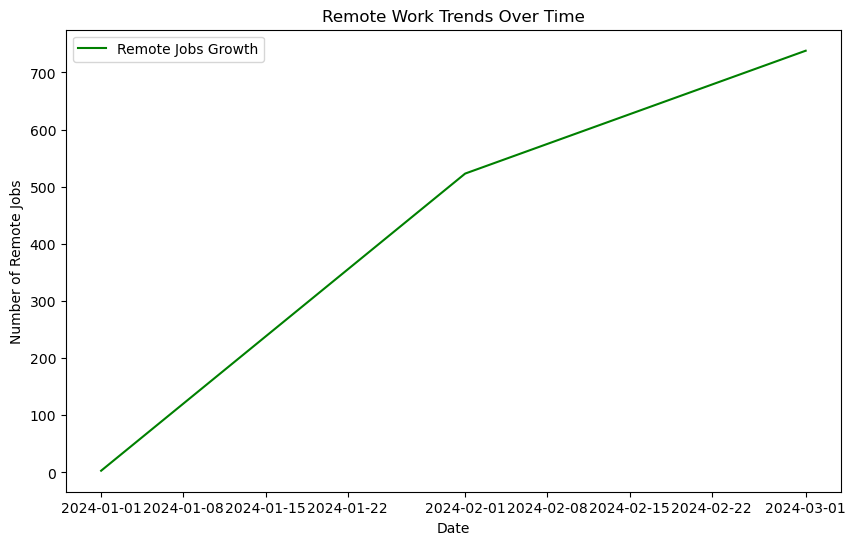

In [51]:
# Visualize trends
plt.figure(figsize=(10, 6))
plt.plot(remote_trends.index.to_timestamp(), remote_trends, label='Remote Jobs Growth', color='green')
plt.title('Remote Work Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Remote Jobs')
plt.legend()
plt.show()

# Task 8: Predicting Future Workforce Trends

In [52]:
# High-growth roles prediction using linear regression
category_trends_numeric = category_trends.drop(columns=['published_date'])

category_trends_numeric['post_count'] = pd.to_numeric(category_trends_numeric['post_count'], errors='coerce').fillna(0)

category_trends_numeric = category_trends_numeric.apply(pd.to_numeric, errors='coerce').fillna(0)

growth_data = category_trends_numeric.diff(axis=1).fillna(0).T
X = np.arange(len(growth_data)).reshape(-1, 1)
future_steps = np.arange(len(growth_data), len(growth_data) + 12).reshape(-1, 1)

In [53]:
from sklearn.linear_model import LinearRegression

predictions = {}
for category in growth_data.columns:
    model = LinearRegression()
    model.fit(X, growth_data[category])
    predictions[category] = model.predict(future_steps)

In [ ]:
# Visualize predictions
predicted_df = pd.DataFrame(predictions, index=pd.date_range(start=role_trends.index[-1], periods=12, freq='ME'))
predicted_df.plot(kind='line', figsize=(12, 6), title="Predicted High-Growth Roles")
plt.show()

ValueError: Image size of 995x4417318 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x600 with 1 Axes>

: 